# Statistics Makeup Assignment 

**July 9, 2018** 

Using the `nba_players.csv` file, please answer the following questions by writing code to produce an analysis and by using Markdown cells to describe the results in your own words. For example, consider the following question: 

> What is the difference in pay between older and younger players? 

To answer this question, you might execute the following code block:

```python
data.groupby('AGE').mean()['SALARY'].sort_values(ascending=False)
```

Then respond with the following analysis in a Markdown block: 

> The median age of NBA players is 27 years old; as seen in the table above, the highest paid NBA players are in their late twenties and early 30s. The average salary by age increases from 26 years old and decreases after 34 years old.

You may use statistical and visual analyses to answer the questions below. 

## Part One: Data Loading 

Load the the dataset into a Pandas DataFrame. Note that the CSV file contains headers representing the column names like PER (player efficiency rating) and GP (Games Played) that represent the season statistics for each player. For more on the various statistics please see the [NBA statistics glossary](http://stats.nba.com/help/glossary).

In [13]:
# Load Dataset
import numpy as np
import pandas as pd
df = pd.read_csv('nba_players.csv')

In [14]:
df.tail()

,PLAYER,TEAM,POS,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,AGE,HT,WT,SALARY
318,Anthony Bennett,CLE,SF,52,12.80,0.42,5.30,14.70,18.70,8.10,18.40,13.10,6.95,-35.10,-1.20,21,80,259,5563920
319,Kendrick Perkins,OKC,C,62,19.50,0.47,17.70,23.70,10.90,8.10,19.90,14.30,6.32,-77.10,-2.60,29,82,270,9654342
320,Jeff Taylor,CHA,SF,26,24.20,0.44,7.70,8.80,17.50,2.70,8.10,5.40,5.97,-42.50,-1.40,25,79,225,915243
321,Dennis Schroder,ATL,PG,49,13.10,0.44,25.80,16.90,18.60,0.90,9.90,5.40,5.81,-49.70,-1.70,20,73,168,1690680
322,John Lucas III,UTAH,PG,42,14.10,0.40,16.10,8.40,16.20,2.30,5.40,3.80,5.23,-50.90,-1.70,31,71,166,1600000


A good first step is to do a quick overview of the dataset. Please print the descriptive statistics of each column. How many rows are in the dataset, e.g. how many players are there? What is the Salary range? Are there any obvious data errors that might exist in the dataset? 

In [15]:
df.columns = ['Player', 'Team', 'POS','GamesPlayed', 'MaximumPointsPerGame', 'TrueShooting%', 'Assists', 'TurnOvers',
                 'Usage%', 'OffensiveReboundRate', 'DefensiveReboundRate', 'ReboundRate', 'PlayerEfficiencyRating',
                 'ValueAdded', 'EstimatedWinsAdded', 'AGE', 'HT', 'WT', 'SALARY']

In [16]:
# Print descriptive statistics
pd.options.display.float_format = '{:.2f}'.format
df.describe()


,GamesPlayed,MaximumPointsPerGame,TrueShooting%,Assists,TurnOvers,Usage%,OffensiveReboundRate,DefensiveReboundRate,ReboundRate,PlayerEfficiencyRating,ValueAdded,EstimatedWinsAdded,AGE,HT,WT,SALARY
count,323.00,323.00,323.00,323.00,323.00,323.00,323.00,323.00,323.00,323.00,323.00,323.00,323.00,323.00,323.00,323.00
mean,67.16,24.88,0.54,15.95,11.04,18.44,5.40,15.04,10.22,14.65,117.62,3.92,27.17,79.14,222.06,5323345.15
std,14.06,7.54,0.05,8.12,2.78,4.68,3.88,5.98,4.67,4.12,143.55,4.78,4.06,3.56,26.85,5038149.32
min,17.00,7.00,0.39,3.30,3.00,8.60,0.80,5.40,3.80,5.23,-89.20,-3.00,19.00,69.00,161.00,0.00
25%,59.50,18.90,0.51,9.70,9.10,14.70,2.15,10.10,6.20,11.99,22.40,0.75,24.00,76.00,200.00,1522920.00
50%,72.00,25.20,0.54,14.10,10.70,18.00,4.00,13.60,9.20,14.10,77.20,2.60,27.00,80.00,222.00,3657500.00
75%,79.00,31.55,0.57,20.95,12.60,21.90,8.40,19.30,14.20,16.70,172.55,5.75,29.00,82.00,240.50,7500000.00
max,83.00,38.70,0.69,47.10,23.70,33.50,17.50,32.10,22.30,29.90,903.80,30.10,39.00,86.00,290.00,23410988.00


_Enter answers here by double clicking on the cell, then "running it" when done_

### Number of players = 323

### Salary Range = 0 - $23,410,988

### Errors include the fact that some players have 0 as salary amount and the Value Added and Estimated Wins Added have negative values (may be okay, need to understand the stat better).

## Part Two: Descriptive Statistics

### What are the highest paid teams in the NBA?

In [17]:
# Enter code here
df.groupby('Team')['SALARY'].sum().sort_values(ascending=False).head()

Team
 BKN    96442106
 NY     87522921
 LAC    75318203
 HOU    71632250
 OKC    70831560
Name: SALARY, dtype: int64

_Enter answers here by double clicking on the cell, then "running it" when done_

### The top 5 highest paid teams are:
* Brooklyn Nets  
* New York Nicks  
* LA Clippers  
* Houston Rockets  
* Oklahoma City Thunder  

### What is the distribution of height and weight for NBA players? Is it normal? If not, what kind of distribution is it?

Text(0,0.5,'Number of Players')

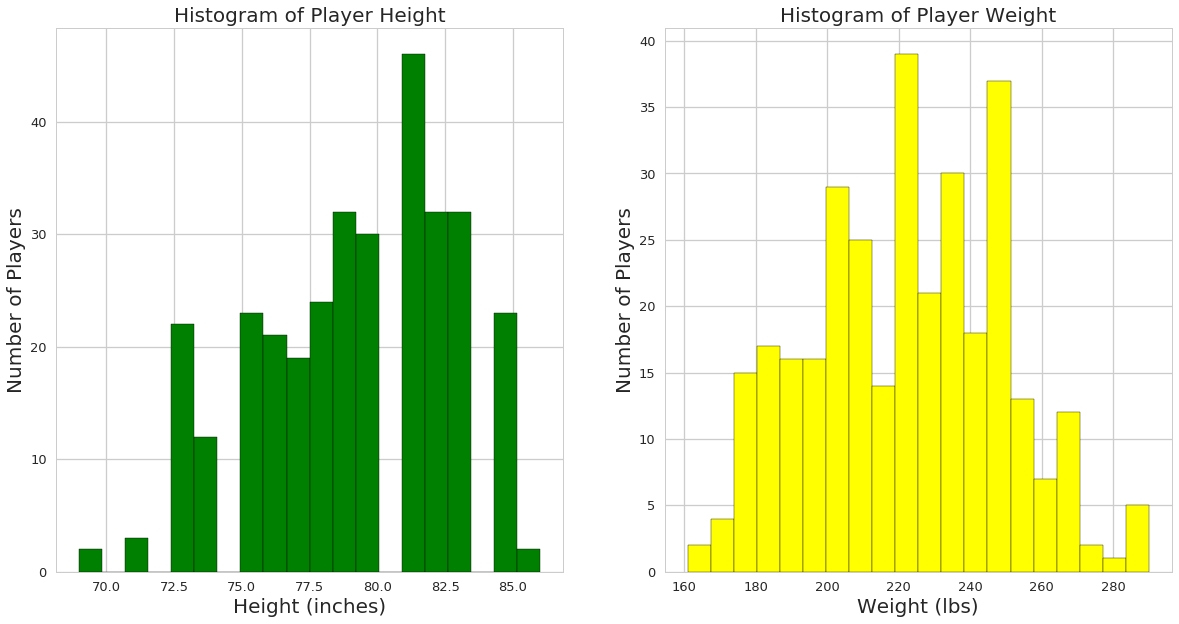

In [18]:
# Enter code here
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.hist(df['HT'], color='green', edgecolor='black', bins=20)
plt.title('Histogram of Player Height', fontsize=20)
plt.xlabel('Height (inches)', fontsize=20)
plt.ylabel('Number of Players', fontsize=20)

plt.subplot(1, 2, 2)
plt.hist(df['WT'], color='yellow', edgecolor='black', bins=20)
plt.title('Histogram of Player Weight', fontsize=20)
plt.xlabel('Weight (lbs)', fontsize=20)
plt.ylabel('Number of Players', fontsize=20)

_Enter answers here by double clicking on the cell, then "running it" when done_

### Player height is not normally distributed, but is skewed to the left.  Player weight is more normally distributed.

### What are the most descriptive central measures for SALARY, AGE, PER, and REBR and why?

In [19]:
# Enter code here

df[['SALARY', 'AGE', 'PlayerEfficiencyRating', 'ReboundRate']].describe()

,SALARY,AGE,PlayerEfficiencyRating,ReboundRate
count,323.00,323.00,323.00,323.00
mean,5323345.15,27.17,14.65,10.22
std,5038149.32,4.06,4.12,4.67
min,0.00,19.00,5.23,3.80
25%,1522920.00,24.00,11.99,6.20
50%,3657500.00,27.00,14.10,9.20
75%,7500000.00,29.00,16.70,14.20
max,23410988.00,39.00,29.90,22.30


_Enter answers here by double clicking on the cell, then "running it" when done_

### The most descriptive measures of central tendency are the mean, median and standard deviation.  The mean and median are important because comparing the two allows you to understand if the distribution if normal or not.  For example, the distribution of AGE and PER are roughly normal since their mean and medians are about equal.  Median also is not affected by extreme values as is the case with SALARY. 

### Standard Deviation is very helpful because it provides a measure of overall dispersion.  One standard deviation indicates that 68% of data points fall within a range that is plus or minus the standard deviation from the mean. The one caveat with this is that it depends on the distribution being normal.

### What position has the highest TS% (True Shooting Percent?) 

In [20]:
# Enter code here
df.groupby('POS')['TrueShooting%'].mean().sort_values(ascending=False).head()

POS
C    0.55
PF   0.54
SG   0.54
SF   0.53
PG   0.52
Name: TrueShooting%, dtype: float64

_Enter answers here by double clicking on the cell, then "running it" when done_

### The center has the highest True Shooting Percentage at 55%.

### What is the variability in maximum points per game (MPG) by position? 

In [21]:
# Enter code here

df.groupby('POS')['MaximumPointsPerGame'].agg(np.std)

POS
C    7.39
PF   7.47
PG   7.45
SF   7.74
SG   7.35
Name: MaximumPointsPerGame, dtype: float64

_Enter answers here by double clicking on the cell, then "running it" when done_

### The variability in maximum points per game by position is measured by standard deviation and is between 7.35 and 7.74.

## Part Three: Correlations

### What field has the highest correlation with PER? 

**NOTE**: Exclude PLAYER, TEAM, POS, AGE, HT, WT, and SALARY 

In [22]:
# Enter code here
corr_matrix = df.corr()
corr_matrix['PlayerEfficiencyRating'].sort_values(ascending=False)

PlayerEfficiencyRating    1.00
EstimatedWinsAdded        0.90
ValueAdded                0.90
Usage%                    0.65
SALARY                    0.59
TrueShooting%             0.58
MaximumPointsPerGame      0.58
DefensiveReboundRate      0.35
ReboundRate               0.33
OffensiveReboundRate      0.23
WT                        0.22
HT                        0.14
GamesPlayed               0.14
AGE                       0.01
Assists                  -0.04
TurnOvers                -0.14
Name: PlayerEfficiencyRating, dtype: float64

_Enter answers here by double clicking on the cell, then "running it" when done_
### Estimated Wins Added and Value Added are equal with the highest correlation with PER at 90%.

### Is there a linear correlation between PER and Salary? 

Text(0,0.5,'Salary')

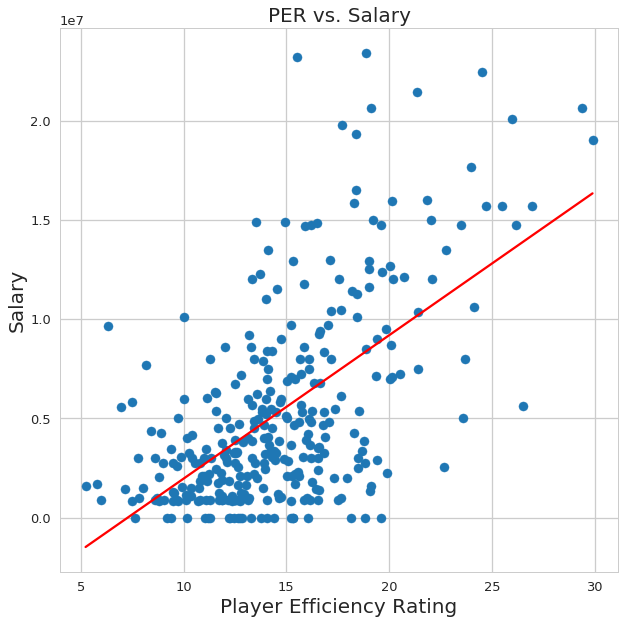

In [23]:
# Enter code here
from numpy.polynomial.polynomial import polyfit

plt.figure(figsize=(10, 10))
x = df['PlayerEfficiencyRating']
y = df['SALARY']
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, b + m * x, '-', c='red')
#plt.scatter(df['PlayerEfficiencyRating'], df['SALARY'], c='red')

plt.title('PER vs. Salary', fontsize=20)
plt.xlabel('Player Efficiency Rating', fontsize=20)
plt.ylabel('Salary', fontsize=20)

In [76]:
print(np.corrcoef(x, y)[0, 1])

0.590974186087


_Enter answers here by double clicking on the cell, then "running it" when done_
### Based on the correlation coefficient and examining the scatter plot there could be a low positive correlation between Player Efficiency Rating and Salary, but there appears also to be heteroskedasticity present which would argue against a linear correlation.

### Is there a quadratic correlation between PER and Salary?

          2
2.86e+04 x - 1.986e+05 x + 1.612e+06


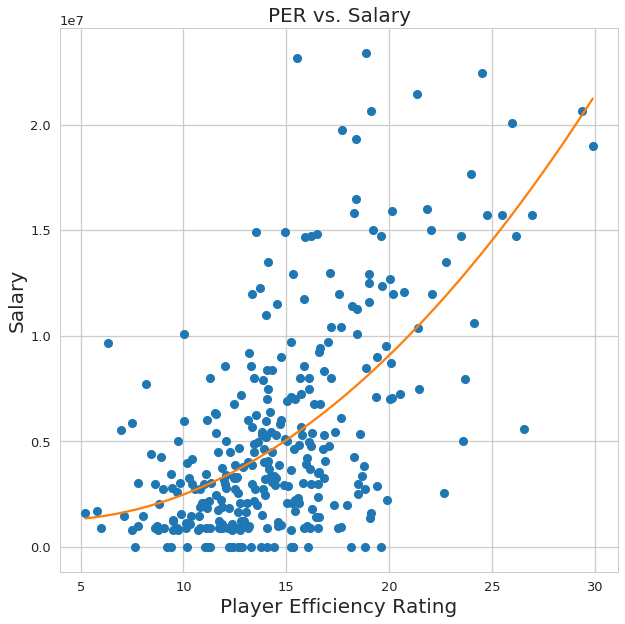

In [24]:
# Enter code here
from matplotlib import pylab
plt.figure(figsize=(10, 10))

z = np.polyfit(x, y, 2)
f = np.poly1d(z)
x_new = np.linspace(x[0], x[322])
y_new = f(x_new)

plt.plot(x, y, 'o', x_new, y_new)
plt.title('PER vs. Salary', fontsize=20)
plt.xlabel('Player Efficiency Rating', fontsize=20)
plt.ylabel('Salary', fontsize=20)

print(f)

_Enter answers here by double clicking on the cell, then "running it" when done_

### There appears to be a quadratic relationship between salary and player efficiency expressed by the equation:

\begin{equation*}
2.86e+04 x^2 - 1.986e+05 x + 1.612e+06
\end{equation*}

### Does the correlation between PER and Salary change if outliers are removed? 

Possible outlier removal techniques: 

- Remove values greater than 3 standard deviations away from mean (3 zscores). 
- Remove min and max values 
- Use only 5% to 95% percentiles 

Text(0.5,0,'Player Efficiency Rating')

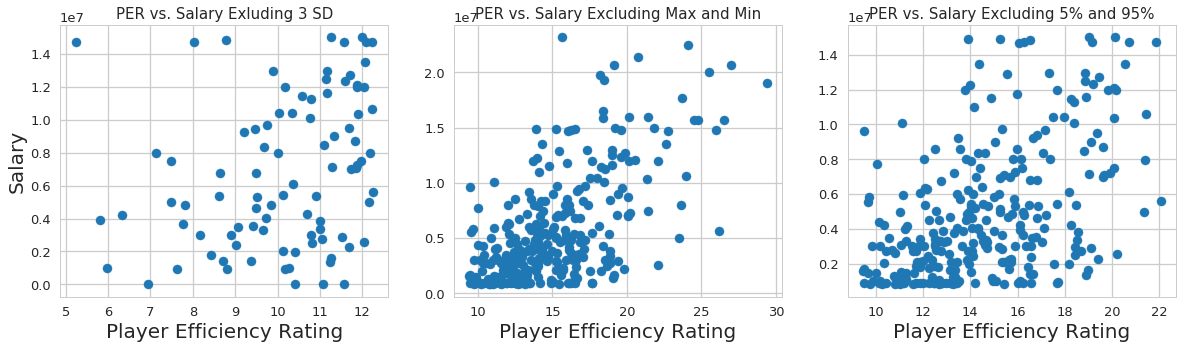

In [25]:
# Enter code here
plt.figure(figsize=(20, 5))

# Excluding 3 Standard Deviations

plt.subplot(1, 3, 1)
x = df['PlayerEfficiencyRating']
std3_per = np.std(x) * 3
x_lessoutliers = [i for i in x if (i < std3_per)]

y = df['SALARY']
std3_salary = np.std(y) * 3
y_lessoutliers = [i for i in y if (i < std3_salary)]
y_lessoutliers

plt.scatter(x_lessoutliers, y_lessoutliers[:len(x_lessoutliers)])

plt.title('PER vs. Salary Exluding 3 SD', fontsize=15)
plt.xlabel('Player Efficiency Rating', fontsize=20)
plt.ylabel('Salary', fontsize=20)

# Excluding Max and Min

plt.subplot(1, 3, 2)
x_lessoutliers2 = [i for i in x if (i < np.max(x) and i > np.min(x))]
y_lessoutliers2 = [i for i in y if (i < np.max(y) and i > np.min(y))]

plt.scatter(x_lessoutliers2[:len(y_lessoutliers2)], y_lessoutliers2)

plt.title('PER vs. Salary Excluding Max and Min', fontsize=15)
plt.xlabel('Player Efficiency Rating', fontsize=20)

# Excluding 5% and 95%

plt.subplot(1, 3, 3)
x_lessoutliers3 = [i for i in x if (i < np.percentile(x, 95) and i > np.percentile(x, 5))]
y_lessoutliers3 = [i for i in y if (i < np.percentile(y, 95) and i > np.percentile(y, 5))]

plt.scatter(x_lessoutliers3[:len(y_lessoutliers3)], y_lessoutliers3)

plt.title('PER vs. Salary Excluding 5% and 95%', fontsize=15)
plt.xlabel('Player Efficiency Rating', fontsize=20)


In [26]:
print(np.corrcoef(x_lessoutliers, y_lessoutliers[:len(x_lessoutliers)]))
print(np.corrcoef(x_lessoutliers2[:len(y_lessoutliers2)], y_lessoutliers2))
print(np.corrcoef(x_lessoutliers3[:len(y_lessoutliers3)], y_lessoutliers3))

[[ 1.          0.27330504]
 [ 0.27330504  1.        ]]
[[ 1.          0.61633306]
 [ 0.61633306  1.        ]]
[[ 1.          0.49670891]
 [ 0.49670891  1.        ]]


_Enter answers here by double clicking on the cell, then "running it" when done_

### Excluding the Max and Min values yields the highest correlation coefficient among the three outlier removal techniques and at 62% is slightly better than not excluding them which yielded a correlation coefficient of 59%.  The other two techniques yielded worse outcomes.

## Part Four: Regression

### Is there a multivariate regression that can predict salary based on player statistics? 

In [43]:
# Enter code here 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['SALARY']
X = df[['GamesPlayed', 'MaximumPointsPerGame', 'TrueShooting%', 'Assists', 'TurnOvers', 'Usage%',
        'OffensiveReboundRate', 'DefensiveReboundRate', 'ReboundRate', 'PlayerEfficiencyRating', 'ValueAdded',
        'EstimatedWinsAdded', 'AGE', 'HT', 'WT']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
GamesPlayed,-30681.01
MaximumPointsPerGame,200341.82
TrueShooting%,-6704546.58
Assists,10135.88
TurnOvers,123903.74
Usage%,37981.24
OffensiveReboundRate,-1167685.98
DefensiveReboundRate,-1124896.30
ReboundRate,2255983.77
PlayerEfficiencyRating,-176546.50


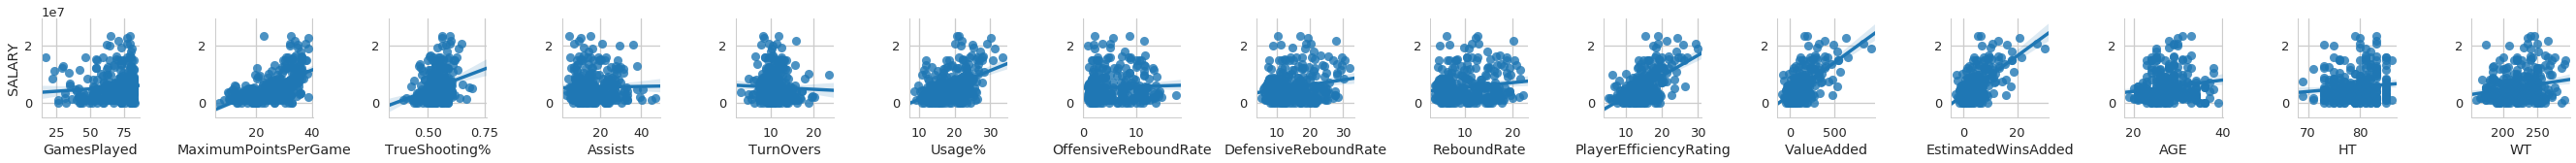

In [29]:
import seaborn as sns
sns.set_context('talk')
sns.set_style('whitegrid')
sns.pairplot(data=df, y_vars = ['SALARY'], x_vars=['GamesPlayed', 'MaximumPointsPerGame', 'TrueShooting%', 'Assists', 'TurnOvers', 'Usage%',
        'OffensiveReboundRate', 'DefensiveReboundRate', 'ReboundRate', 'PlayerEfficiencyRating', 'ValueAdded',
        'EstimatedWinsAdded', 'AGE', 'HT', 'WT'], kind='reg')

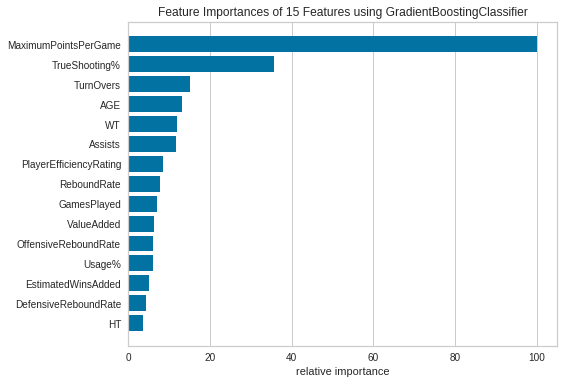

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(X, y)
viz.poof()

<bound method Visualizer.poof of FeatureImportances(absolute=False,
          ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df0921cc0>,
          labels=None, model=None, relative=False, xlabel=None)>

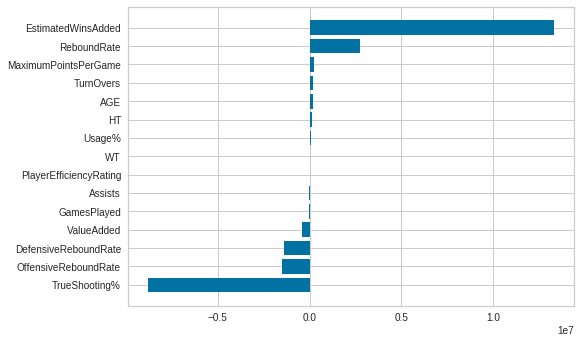

In [31]:
from sklearn.linear_model import Lasso

fig2 = plt.figure()
ax = fig2.add_subplot()
viz = FeatureImportances(Lasso(alpha=0.013, max_iter=1000000, tol=0.0001), ax=ax, relative=False)
viz.fit(X, y)
viz.poof

/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


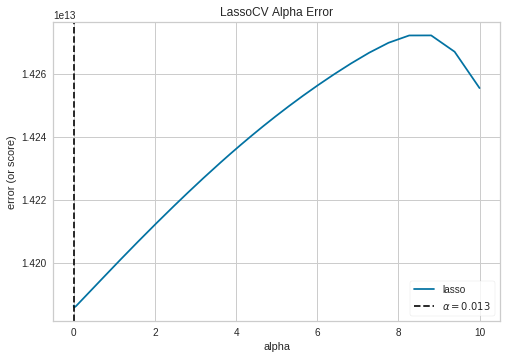

In [44]:
import numpy as np

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 400)

model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X, y)
visualizer.poof()

In [33]:
y = df['SALARY']
X = df[['TrueShooting%', 'ReboundRate', 'EstimatedWinsAdded']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_pred = regressor.predict(X_test)
df_ActVsPredict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_ActVsPredict.head(10)

,Actual,Predicted
294,1227985,2868437.40
65,10434782,8769385.94
15,2568360,13039466.44
272,915243,2454060.16
140,6000000,5352413.29
153,4505280,5742148.21
101,7500000,6752029.63
234,1825359,3256319.60
63,19754465,6649364.19
159,3678360,4002741.86


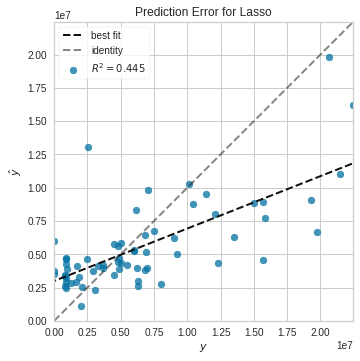

In [35]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

lasso = Lasso(alpha=0.013, max_iter=1000000, tol=0.0001)
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

<bound method Visualizer.poof of FeatureImportances(absolute=False,
          ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0df10a0860>,
          labels=None, model=None, relative=False, xlabel=None)>

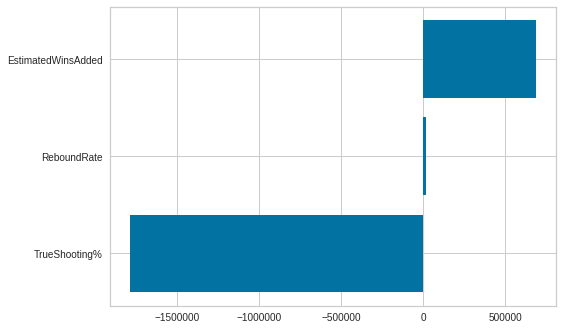

In [36]:
from sklearn.linear_model import Ridge

fig3 = plt.figure()
ax = fig3.add_subplot()
viz = FeatureImportances(Ridge(), ax=ax, relative=False)
viz.fit(X, y)
viz.poof

In [37]:
y = df['SALARY']
X = df[['TrueShooting%', 'EstimatedWinsAdded']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
y_pred = regressor.predict(X_test)
df_ActVsPredict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_ActVsPredict.head(10)

,Actual,Predicted
294,1227985,2746772.25
65,10434782,8515867.56
15,2568360,12581418.36
272,915243,2577389.79
140,6000000,5677824.34
153,4505280,5929707.41
101,7500000,7002586.90
234,1825359,3109020.28
63,19754465,6938298.38
159,3678360,3556404.43


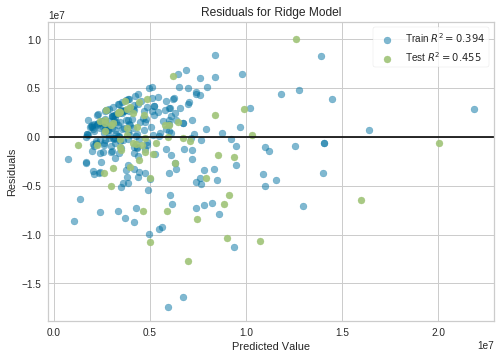

In [39]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

0.273704604681 0.649390591329 0.590974186087


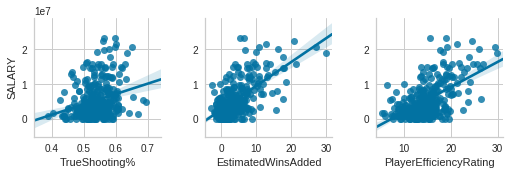

In [75]:
sns.pairplot(data=df, y_vars = ['SALARY'], x_vars=['TrueShooting%', 'EstimatedWinsAdded', 'PlayerEfficiencyRating'],
             kind='reg')
print(np.corrcoef(df['SALARY'], df['TrueShooting%'])[0, 1],
      np.corrcoef(df['SALARY'], df['EstimatedWinsAdded'])[0, 1],
      np.corrcoef(df['SALARY'], df['PlayerEfficiencyRating'])[0, 1])

_Enter answers here by double clicking on the cell, then "running it" when done_

### If there is a multivariate relationship between player stats and salary, I cannot find one.  Trying both L1 and L2 models yields similar results when eliminating features that are not significant with correlation coefficients of around 45%.  Looking at the correlation matrix of salary vs. all player stats, it looks like a simple regression model is best using Estimated Wins Added since that has the highest correlation to salary at 65%.